# load data

In [2]:
# 常用資料處理模組
import numpy as np
import pandas as pd    
# 可視化模組
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
from sklearn.preprocessing import OneHotEncoder
from matplotlib import cm
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import *
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv('PTT_Data_All_v3.csv')

# data preprocess

In [4]:
col_drop = ['Author','Target_Investment',
'Target_Loan', 'Target_Bank', 'Target_Foreign_Currency',
'Stock',
'Fund',
'ForeignEX',
'Foreign_Inv',
'Insurance',
'Warrant',
'Option',
'loan_demand_house',
'loan_amt_house',
'loan_demand_others',
'loan_amt_others']

In [5]:
df1.columns

Index(['Author', 'Taget_Financial_Management', 'Target_Investment',
       'Target_Loan', 'Target_Bank', 'Target_Foreign_Currency', 'Foreign_Inv',
       'ForeignEX', 'Fund', 'Insurance', 'Option', 'Stock', 'Warrant',
       'GENDER', 'age', 'risk_level', 'loan_demand_house', 'loan_amt_house',
       'loan_demand_others', 'loan_amt_others', '八卦版', '學校版', '學術版', '寵物飼養',
       '戲劇表演', '政黑', '旅行', '汽機車研究', '理財資訊', '考試經驗', '表特版', '買賣交易', '資訊領域',
       '軍旅生活', '追星', 'insurance_demand_1', '醫療健康_1', 'Habit_Others_1',
       'Area_1', '生活經歷分享_1', '語言文化_1', '生活資訊_1', '閱讀_1', '影視_1', '電玩_1',
       '美容穿搭_1', '生活娛樂_1', '運動_1', '音樂樂器_1'],
      dtype='object')

In [6]:
df1.drop(columns = col_drop,inplace=True)

In [7]:
df = df1.copy()

In [8]:
df = df[['Taget_Financial_Management', 'GENDER', 'age', 'risk_level', '八卦版',
       '學校版', '學術版', '寵物飼養', '戲劇表演', '政黑', '旅行', '汽機車研究', '理財資訊', '考試經驗',
       '表特版', '買賣交易', '資訊領域', '軍旅生活', '追星', 'insurance_demand_1', '醫療健康_1',
       'Habit_Others_1', 'Area_1', '生活經歷分享_1', '語言文化_1', '生活資訊_1', '閱讀_1',
       '影視_1', '電玩_1', '美容穿搭_1', '生活娛樂_1', '運動_1', '音樂樂器_1']]

In [9]:
# df = df[['Taget_Financial_Management', 'GENDER', 'age', 'risk_level', '12星座',
#        '事務版', '交友', '人生經歷', '兩性關係', '八卦版', '動漫', '地區版', '外國版', '外語學習', '大眾交通',
#        '娛樂生活', '學校版', '學術版', '家庭生活', '寵物飼養', '戲劇表演', '房屋資訊', '政黑', '文學研究',
#        '旅行', '書版', '桌遊', '樂器研究', '汽機車研究', '球類運動', '理財資訊', '生活智慧', '留學遊學',
#        '綜藝節目', '線上電玩', '美容美體', '美食', '考試經驗', '聊天', '職場雜談', '衣著配件', '表特版',
#        '買賣交易', '資訊領域', '軍旅生活', '追劇', '追星', '運動', '電影', '電玩', '電視頻道', '黑特',
#        'insurance_demand_1', '音樂_1', '醫療健康_1', 'Habit_Others_1', 'Area_1']]

# onehotencoder

In [12]:
for i in df.columns.tolist():
    df[i] = df[i].replace(0.0,0).replace(1.0,1)

In [13]:
df['risk_level'] = df['risk_level'].fillna('None')
df['age'] = df['age'].fillna(df.age.median())
# df['loan_amt_house'] = df['loan_amt_house'].fillna(df['loan_amt_house'].median())
# df['loan_amt_others'] = df['loan_amt_others'].fillna(df['loan_amt_others'].median())

In [14]:
df_feature = df.iloc[:,1:df.shape[1]]

In [15]:
df_feature.head()

GENDER   age risk_level  八卦版  學校版  學術版  寵物飼養  戲劇表演   政黑   旅行   ...    \
0   None  34.0       None  0.0  0.0  0.0   0.0   0.0  0.0  0.0   ...     
1      男  40.0       None  0.0  0.0  0.0   0.0   0.0  0.0  1.0   ...     
2   None  34.0       None  0.0  0.0  0.0   0.0   0.0  0.0  0.0   ...     
3   None  34.0       None  0.0  0.0  0.0   0.0   0.0  0.0  1.0   ...     
4   None  34.0       None  1.0  0.0  0.0   0.0   0.0  0.0  0.0   ...     

   生活經歷分享_1  語言文化_1  生活資訊_1  閱讀_1  影視_1  電玩_1  美容穿搭_1  生活娛樂_1  運動_1  音樂樂器_1  
0       0.0     0.0     0.0   0.0   0.0   0.0     0.0     0.0   0.0     0.0  
1       0.0     0.0     0.0   0.0   1.0   0.0     0.0     1.0   1.0     1.0  
2       0.0     0.0     1.0   0.0   0.0   0.0     1.0     1.0   0.0     0.0  
3       0.0     0.0     0.0   0.0   0.0   0.0     0.0     0.0   0.0     0.0  
4       1.0     0.0     0.0   0.0   0.0   1.0     0.0     0.0   1.0     0.0  

[5 rows x 32 columns]

In [16]:
df_feature_o= df_feature.select_dtypes(include=['O']) # object   
df_feature_n= df_feature.select_dtypes(exclude=['O']) #numeric

In [17]:
data_dummy = pd.get_dummies(df_feature_o,dummy_na=True,drop_first=False) 

In [18]:
scaler = StandardScaler()
# Fit your data on the scaler object
df_feature_n_scaled = scaler.fit_transform(df_feature_n)
df_feature_n_scaled = pd.DataFrame(df_feature_n_scaled,columns = df_feature_n.columns.tolist() )

In [19]:
clust_data = pd.concat([df_feature_n_scaled.reset_index(drop=True),
                         data_dummy.reset_index(drop=True)],axis= 1)

In [20]:
clust_data.shape

(366484, 50)

In [22]:
clust_data.head()

age       八卦版       學校版       學術版      寵物飼養      戲劇表演        政黑  \
0  0.028586 -0.329691 -0.394149 -0.156652 -0.330738 -0.259476 -0.107438   
1  4.739509 -0.329691 -0.394149 -0.156652 -0.330738 -0.259476 -0.107438   
2  0.028586 -0.329691 -0.394149 -0.156652 -0.330738 -0.259476 -0.107438   
3  0.028586 -0.329691 -0.394149 -0.156652 -0.330738 -0.259476 -0.107438   
4  0.028586  3.033141 -0.394149 -0.156652 -0.330738 -0.259476 -0.107438   

         旅行     汽機車研究      理財資訊     ...      risk_level_8  risk_level_None  \
0 -0.452695 -0.293495 -0.440229     ...                 0                1   
1  2.208991 -0.293495 -0.440229     ...                 0                1   
2 -0.452695 -0.293495 -0.440229     ...                 0                1   
3  2.208991 -0.293495 -0.440229     ...                 0                1   
4 -0.452695 -0.293495 -0.440229     ...                 0                1   

   risk_level_nan  Area_1_None  Area_1_中  Area_1_北  Area_1_南  Area_1_東  \
0               0            1         0         0         0         0   
1               0            0         1         0         0         0   
2               0            1         0         0         0         0   
3               0            1         0         0         0         0   
4               0            0         0         1         0         0   

   Area_1_離島  Area_1_nan  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          0           0  

[5 rows x 50 columns]

In [23]:
x = clust_data.values

In [24]:
x

array([[ 0.02858599, -0.32969123, -0.39414946, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.73950939, -0.32969123, -0.39414946, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02858599, -0.32969123, -0.39414946, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.02858599, -0.32969123, -0.39414946, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02858599, -0.32969123, -0.39414946, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02858599, -0.32969123, -0.39414946, ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
clust_data.age.mean()

-4.2599526828240584e-16

# silhouette_score with clustering algorithms

In [27]:
x_s1,x_s2= train_test_split(x, test_size=0.1, random_state=23)

In [28]:
x_s2.shape

(36649, 50)

In [29]:
def clustering(method):
    try:
        cluster = method.fit_predict(x_s2)
        silhouette_avg = silhouette_score(x_s2,cluster)
        return silhouette_avg
    except AttributeError:
        cluster = method.fit(x_s2)
        cluster = method.predict(x_s2)
        silhouette_avg = silhouette_score(x_s2,cluster)
#         s= [silhouette_avg]
        return silhouette_avg

In [29]:
km = KMeans(n_clusters=3)
gm = BayesianGaussianMixture(n_components =3)
hi = AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3)
# sc = SpectralClustering(3, affinity='precomputed', n_init=100,assign_labels='discretize')
# op = OPTICS(eps=0.5, min_samples=3, metric='euclidean', metric_params=None, algorithm='auto')
db = DBSCAN(eps=0.5, min_samples=3, metric='euclidean', metric_params=None, algorithm='auto')
brc = Birch(branching_factor=200, n_clusters=3, threshold=0.8,compute_labels=True)

In [31]:
import datetime

In [ ]:
a = []
time = []
starttime = datetime.datetime.now()
for i in [km,hi,gm,db,brc]:
    a.append([i,clustering(i)])
    endtime = datetime.datetime.now()
    time.append((endtime - starttime).seconds)

In [ ]:
score = pd.concat([pd.DataFrame(a,columns = ['method','score']),pd.DataFrame(time,columns = ['time(sec)'])],axis=1)

In [ ]:
score

In [ ]:
score.to_csv('score.csv')

# k-means

In [30]:
kmeans_fit = KMeans(n_clusters =3).fit(x)
cluster = kmeans_fit.fit_predict(x)

In [31]:
cluster_result = pd.DataFrame(cluster,columns=['group'])

In [32]:
cluster_result = cluster_result.reset_index(drop=True)

In [33]:
df = df.reset_index(drop=True)

In [34]:
result = pd.concat([df,cluster_result],axis=1)

In [36]:
x_s1,x_s2,clust_s1,clust_s2= train_test_split(x, cluster,test_size=0.5, random_state=23)

# Dimension reduction

In [78]:
# from sklearn import manifold

# # X, y = x, result.group.values
# X, y = x_s2, clust_s2 #sampling result
# n_samples, n_features = X.shape


# tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
# X_tsne = tsne.fit_transform(X)

# print("Org data dimension is {}.      Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

# x_min, x_max = X_tsne.min(0), X_tsne.max(0)
# X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
# plt.figure(figsize=(8, 8))
# for i in range(X_norm.shape[0]): plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
#              fontdict={'weight': 'bold', 'size': 9})
# plt.xticks([])
# plt.yticks([])
# plt.show()

# Feature importance

In [72]:
clust_data.columns

Index(['age', '八卦版', '學校版', '學術版', '寵物飼養', '戲劇表演', '政黑', '旅行', '汽機車研究', '理財資訊',
       '考試經驗', '表特版', '買賣交易', '資訊領域', '軍旅生活', '追星', 'insurance_demand_1',
       '醫療健康_1', 'Habit_Others_1', '生活經歷分享_1', '語言文化_1', '生活資訊_1', '閱讀_1',
       '影視_1', '電玩_1', '美容穿搭_1', '生活娛樂_1', '運動_1', '音樂樂器_1', 'GENDER_None',
       'GENDER_女', 'GENDER_男', 'GENDER_nan', 'risk_level_1', 'risk_level_2',
       'risk_level_3', 'risk_level_4', 'risk_level_5', 'risk_level_6',
       'risk_level_7', 'risk_level_8', 'risk_level_None', 'risk_level_nan',
       'Area_1_None', 'Area_1_中', 'Area_1_北', 'Area_1_南', 'Area_1_東',
       'Area_1_離島', 'Area_1_nan'],
      dtype='object')

In [73]:
# from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
# model = XGBClassifier(random_state=42, max_depth=5)
model = RandomForestClassifier(random_state=42, max_depth=10)
model.fit(clust_data, cluster_result)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

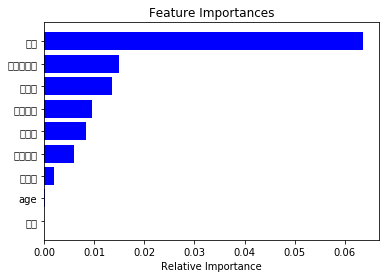

In [74]:
features = clust_data.columns
importances = model.feature_importances_
indices = np.argsort(importances[0:9])  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [75]:
importances[indices]

array([3.99584723e-05, 2.49717736e-04, 1.89365772e-03, 6.00393383e-03,
       8.33011484e-03, 9.47029620e-03, 1.34624724e-02, 1.48806854e-02,
       6.36457549e-02])

In [76]:
[features[i] for i in indices]

['政黑', 'age', '學術版', '寵物飼養', '學校版', '戲劇表演', '八卦版', '汽機車研究', '旅行']

# Kmeans with important features

In [77]:
x = clust_data[[features[i] for i in indices]]

In [78]:
x_s1,x_s2= train_test_split(x, test_size=0.1, random_state=23)

In [79]:
x_s2.shape

(36649, 9)

In [80]:
def clustering(method):
    try:
        cluster = method.fit_predict(x_s2)
        silhouette_avg = silhouette_score(x_s2,cluster)
        return silhouette_avg
    except AttributeError:
        cluster = method.fit(x_s2)
        cluster = method.predict(x_s2)
        silhouette_avg = silhouette_score(x_s2,cluster)
#         s= [silhouette_avg]
        return silhouette_avg

In [81]:
km = KMeans(n_clusters=3)
gm = BayesianGaussianMixture(n_components =3)
hi = AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3)
# sc = SpectralClustering(3, affinity='precomputed', n_init=100,assign_labels='discretize')
# op = OPTICS(eps=0.5, min_samples=3, metric='euclidean', metric_params=None, algorithm='auto')
db = DBSCAN(eps=0.8, min_samples=3, metric='euclidean', metric_params=None, algorithm='auto')
brc = Birch(branching_factor=200, n_clusters=3, threshold=0.8,compute_labels=True)

In [82]:
import datetime

In [83]:
a = []
time = []
starttime = datetime.datetime.now()
for i in [km,hi,gm,db,brc]:
    a.append([i,clustering(i)])
    endtime = datetime.datetime.now()
    time.append((endtime - starttime).seconds)

In [84]:
scores = pd.concat([pd.DataFrame(a,columns = ['method','score']),pd.DataFrame(time,columns = ['time(sec)'])],axis=1)

In [85]:
scores

method     score  time(sec)
0  KMeans(algorithm='auto', copy_x=True, init='k-...  0.492717         54
1  AgglomerativeClustering(affinity='euclidean', ...  0.480832        135
2  BayesianGaussianMixture(covariance_prior=None,...  0.417306        187
3  DBSCAN(algorithm='auto', eps=0.8, leaf_size=30...  0.881391        268
4  Birch(branching_factor=200, compute_labels=Tru...  0.698813        322

In [86]:
scores.to_csv('score_para_impo.csv')

In [52]:
scores

method     score
0  KMeans(algorithm='auto', copy_x=True, init='k-...  0.492717
1  AgglomerativeClustering(affinity='euclidean', ...  0.480832
2  BayesianGaussianMixture(covariance_prior=None,...  0.442416
3  DBSCAN(algorithm='auto', eps=0.8, leaf_size=30...  0.881391
4  Birch(branching_factor=200, compute_labels=Tru...  0.698813

# Group data analysis

In [184]:
result.group.value_counts()

0    300470
1     61832
2      4182
Name: group, dtype: int64

In [62]:
result[result.group==0].describe()
result[result.group==1].describe()
result[result.group==2].describe()

Taget_Financial_Management         age         八卦版         學校版  \
count                  645.000000  645.000000  645.000000  645.000000   
mean                     0.108527   34.217054    0.589147    0.085271   
std                      0.311286    3.272702    0.492370    0.279502   
min                      0.000000    9.000000    0.000000    0.000000   
25%                      0.000000   34.000000    0.000000    0.000000   
50%                      0.000000   34.000000    1.000000    0.000000   
75%                      0.000000   34.000000    1.000000    0.000000   
max                      1.000000   68.000000    1.000000    1.000000   

              學術版        寵物飼養        戲劇表演     政黑          旅行       汽機車研究  \
count  645.000000  645.000000  645.000000  645.0  645.000000  645.000000   
mean     0.037209    0.075969    0.054264    1.0    0.179845    0.144186   
std      0.189421    0.265154    0.226713    0.0    0.384356    0.351551   
min      0.000000    0.000000    0.000000    1.0    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    1.0    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    1.0    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    1.0    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.0    1.000000    1.000000   

       ...        語言文化_1      生活資訊_1        閱讀_1        影視_1        電玩_1  \
count  ...    645.000000  645.000000  645.000000  645.000000  645.000000   
mean   ...      0.106977    0.272868    0.068217    0.227907    0.317829   
std    ...      0.309324    0.445779    0.252314    0.419808    0.465994   
min    ...      0.000000    0.000000    0.000000    0.000000    0.000000   
25%    ...      0.000000    0.000000    0.000000    0.000000    0.000000   
50%    ...      0.000000    0.000000    0.000000    0.000000    0.000000   
75%    ...      0.000000    1.000000    0.000000    0.000000    1.000000   
max    ...      1.000000    1.000000    1.000000    1.000000    1.000000   

           美容穿搭_1      生活娛樂_1        運動_1      音樂樂器_1  group  
count  645.000000  645.000000  645.000000  645.000000  645.0  
mean     0.116279    0.472868    0.336434    0.048062    2.0  
std      0.320808    0.499651    0.472856    0.214063    0.0  
min      0.000000    0.000000    0.000000    0.000000    2.0  
25%      0.000000    0.000000    0.000000    0.000000    2.0  
50%      0.000000    0.000000    0.000000    0.000000    2.0  
75%      0.000000    1.000000    1.000000    0.000000    2.0  
max      1.000000    1.000000    1.000000    1.000000    2.0  

[8 rows x 31 columns]

In [63]:
result[result.group==0].iloc[:,1:result.shape[1]].describe(include=["object"])

GENDER risk_level Area_1
count   12963      12963  12963
unique      3          7      5
top      None       None      北
freq     5118      12751   8939

In [64]:
result[result.group==1].iloc[:,1:result.shape[1]].describe(include=["object"])

GENDER risk_level Area_1
count   61513      61513  61513
unique      3          7      6
top         男       None      北
freq    22877      61023  40019

In [65]:
result[result.group==2].iloc[:,1:result.shape[1]].describe(include=["object"])

GENDER risk_level Area_1
count     645        645    645
unique      3          5      5
top         男       None      北
freq      328        639    418